# Logistics Regression (Scratch）

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            -0.900681          1.019004          -1.340227         -1.315444   
1            -1.143017         -0.131979          -1.340227         -1.315444   
2            -1.385353          0.328414          -1.397064         -1.315444   
3            -1.506521          0.098217          -1.283389         -1.315444   
4            -1.021849          1.249201          -1.340227         -1.315444   
..                 ...               ...                ...               ...   
145           1.038005         -0.131979           0.819596          1.448832   
146           0.553333         -1.282963           0.705921          0.922303   
147           0.795669         -0.131979           0.819596          1.053935   
148           0.432165          0.788808           0.933271          1.448832   
149           0.068662         -0.131979           0.762758          0.790671   

       species  
0       se

C:\Users\Ruopeng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


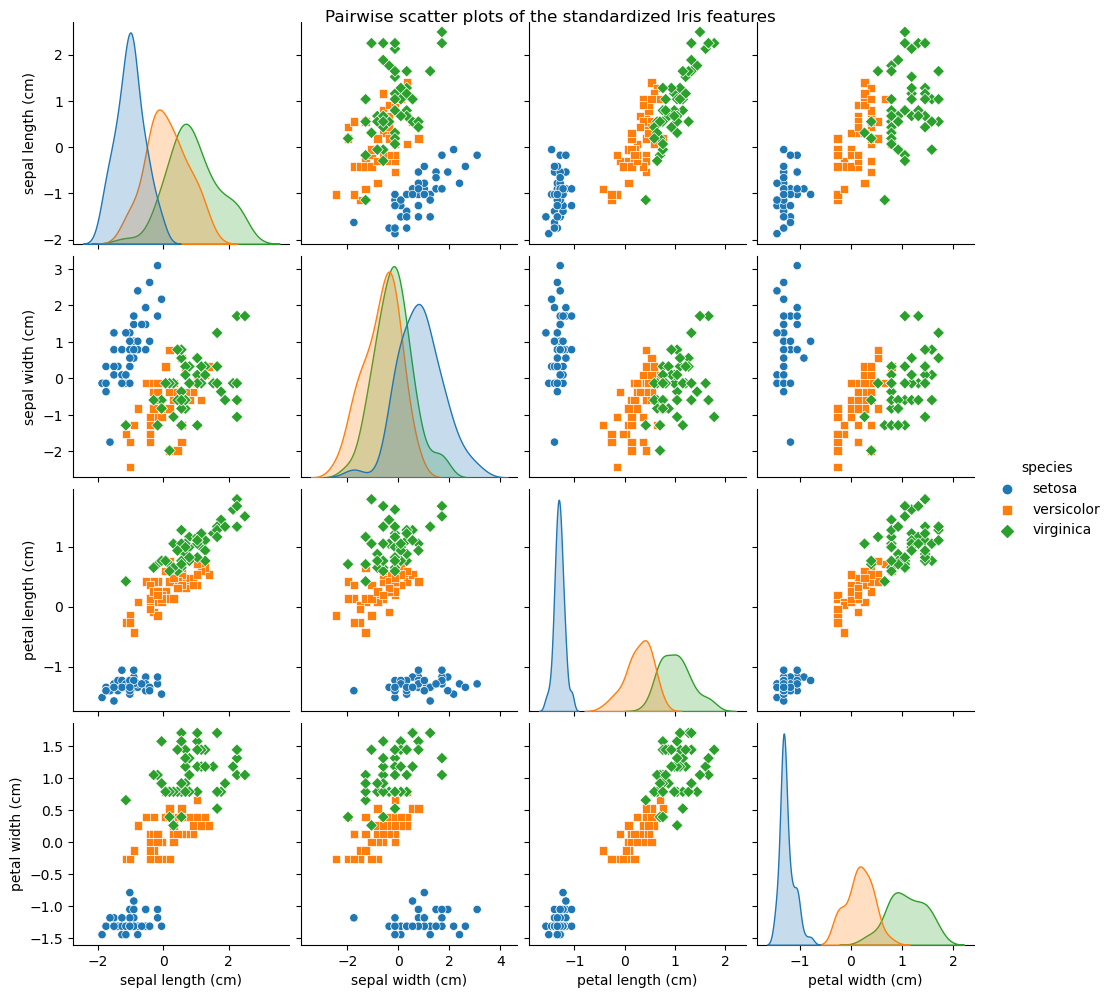

C:\Users\Ruopeng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


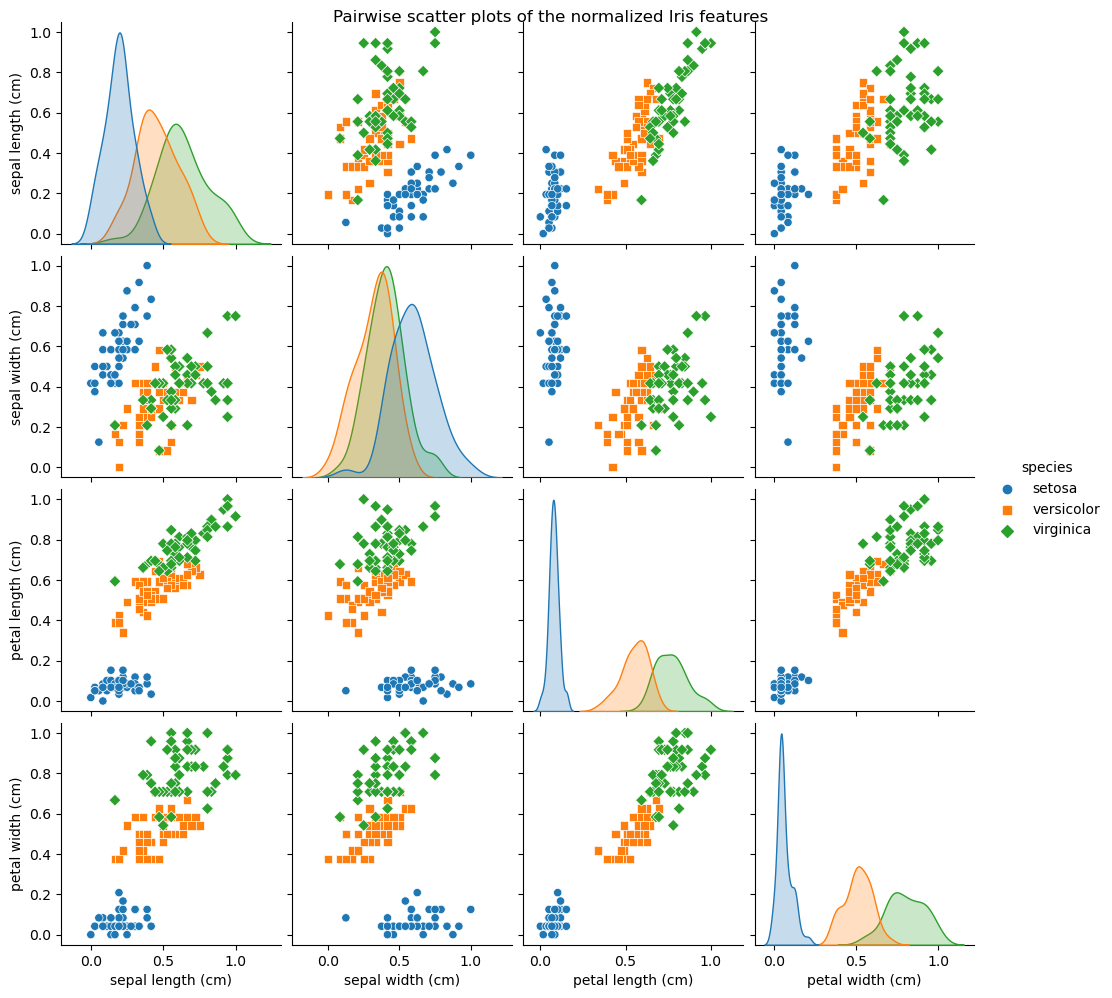

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
#print(df.head())
# Standardization
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_standardized['species'] = df['species']
#print(df_standardized)
# Normalization
scaler_normalize = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_normalize.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_normalized['species'] = df['species']
print(df_standardized)
# Visualize the standardized data
sns.pairplot(df_standardized, hue="species", markers=["o", "s", "D"])
plt.suptitle('Pairwise scatter plots of the standardized Iris features', verticalalignment='bottom')
plt.show()

# Visualize the normalized data
sns.pairplot(df_normalized, hue="species", markers=["o", "s", "D"])
plt.suptitle('Pairwise scatter plots of the normalized Iris features', verticalalignment='bottom')
plt.show()


In [2]:
# Convert labels to one-hot encoding
X = df_standardized.drop('species', axis=1)  # Features
y = df_standardized['species']              # Labels
print(X)
print(y)
def manual_label_encode(y):
    
    unique_classes = np.unique(y)
    class_to_int = {key: idx for idx, key in enumerate(unique_classes)}

    integer_encoded = np.array([class_to_int[item] for item in y])
    return integer_encoded
def manual_one_hot_encode(y):
    # Conversion to integer encoding
    integer_encoded = manual_label_encode(y)

    # Creating One Hot Codes
    one_hot = np.zeros((integer_encoded.size, integer_encoded.max() + 1))
    one_hot[np.arange(integer_encoded.size), integer_encoded] = 1
    return one_hot

y_one_hot = manual_one_hot_encode(y)
print(y_one_hot)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
print(y_train)



     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]
0         setosa
1         setosa
2     

In [3]:
# Softmax function
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-12)) / m
    return loss

# Gradient computation
def compute_gradients(X, y, y_pred):
    m = X.shape[0]
    dz = y_pred - y
    dw = np.dot(X.T, dz) / m
    return dw

# Update weights
def update_weights(w, dw, learning_rate=0.01):
    w -= learning_rate * dw
    return w

# Training logistic regression from scratch
def train_logistic_regression(X, y, learning_rate=0.01, epochs=100):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.random.rand(X.shape[1], y.shape[1])
    for epoch in range(epochs):
        scores = np.dot(X, weights)
        predictions = softmax(scores)
        loss = cross_entropy_loss(predictions, y)
        gradients = compute_gradients(X, y, predictions)
        weights = update_weights(weights, gradients, learning_rate)
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    return weights

# Train the model
weights = train_logistic_regression(X_train, y_train,epochs = 1000)

# Prediction
def predict(X, weights):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    scores = np.dot(X, weights)
    predictions = softmax(scores)
    return np.argmax(predictions, axis=1)

# Evaluate the model
y_pred_train = predict(X_train, weights)
y_pred_test = predict(X_test, weights)

# Convert one-hot to labels for accuracy calculation
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
train_accuracy = np.mean(y_pred_train == y_train_labels)
test_accuracy = np.mean(y_pred_test == y_test_labels)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_labels, y_pred_test, average='macro')
recall = recall_score(y_test_labels, y_pred_test, average='macro')
f1 = f1_score(y_test_labels, y_pred_test, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Epoch 0, Loss: 1.6114575674598666
Epoch 10, Loss: 1.4470472760684545
Epoch 20, Loss: 1.3078140057556047
Epoch 30, Loss: 1.1906606792246937
Epoch 40, Loss: 1.092323675254516
Epoch 50, Loss: 1.0097353359201482
Epoch 60, Loss: 0.940194635620249
Epoch 70, Loss: 0.8814099373306656
Epoch 80, Loss: 0.8314763550367817
Epoch 90, Loss: 0.7888280035813894
Epoch 100, Loss: 0.7521854634749624
Epoch 110, Loss: 0.7205068105928817
Epoch 120, Loss: 0.6929448472745178
Epoch 130, Loss: 0.6688108754537709
Epoch 140, Loss: 0.6475445499078218
Epoch 150, Loss: 0.6286891045106779
Epoch 160, Loss: 0.611871193469001
Epoch 170, Loss: 0.596784613782524
Epoch 180, Loss: 0.5831772359921954
Epoch 190, Loss: 0.570840550025758
Epoch 200, Loss: 0.5596013195337699
Epoch 210, Loss: 0.5493149227576491
Epoch 220, Loss: 0.5398600351695237
Epoch 230, Loss: 0.5311343761844132
Epoch 240, Loss: 0.5230512985196148
Epoch 250, Loss: 0.515537044850916
Epoch 260, Loss: 0.5085285334893743
Epoch 270, Loss: 0.5019715642773429
Epoch 280

Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.62      0.76        13
   virginica       0.72      1.00      0.84        13

    accuracy                           0.89        45
   macro avg       0.91      0.87      0.87        45
weighted avg       0.92      0.89      0.88        45



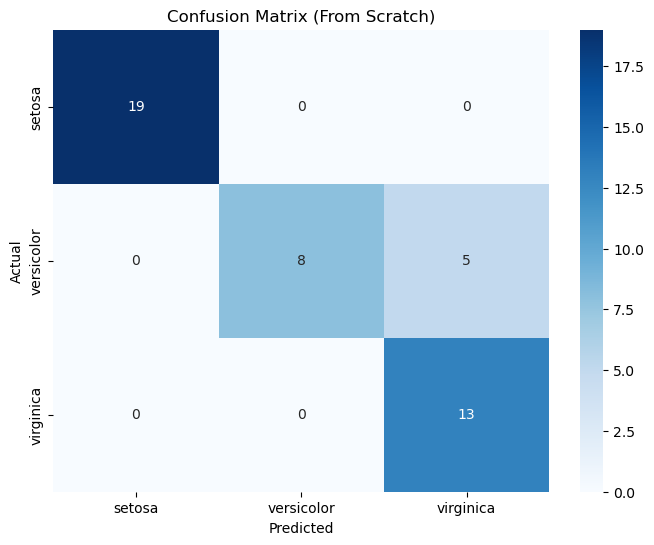

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
y_test_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_labels, y_pred_test)

report = classification_report(y_test_labels, y_pred_test, target_names=iris.target_names)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (From Scratch)')
plt.show()


In [5]:
from sklearn.model_selection import KFold

def cross_validate(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    # Make sure X and y are numpy array
    X_np = X if isinstance(X, np.ndarray) else X.values
    y_np = y if isinstance(y, np.ndarray) else y.values

    for train_index, test_index in kf.split(X_np):
        X_train, X_test = X_np[train_index], X_np[test_index]
        y_train, y_test = y_np[train_index], y_np[test_index]
                
        
        
        weights = train_logistic_regression(X_train, y_train, epochs=10000)
        
        y_pred_test = predict(X_test, weights)
        y_test_labels = np.argmax(y_test, axis=1)
        accuracy = np.mean(y_pred_test == y_test_labels)
        accuracies.append(accuracy)
    
    return np.mean(accuracies)

# Perform cross-validation
cv_accuracy = cross_validate(X, y_one_hot)
print("Cross-Validation Accuracy:", cv_accuracy)

Epoch 0, Loss: 1.2853553509046278
Epoch 10, Loss: 1.1815103463762544
Epoch 20, Loss: 1.0874170346692689
Epoch 30, Loss: 1.0031952381958422
Epoch 40, Loss: 0.9287531861142923
Epoch 50, Loss: 0.8637240062167237
Epoch 60, Loss: 0.807471239413818
Epoch 70, Loss: 0.7591533991761892
Epoch 80, Loss: 0.7178182314289798
Epoch 90, Loss: 0.6824951275855752
Epoch 100, Loss: 0.652265361640768
Epoch 110, Loss: 0.6263040679584897
Epoch 120, Loss: 0.6038976922693672
Epoch 130, Loss: 0.5844444799496524
Epoch 140, Loss: 0.5674453299287456
Epoch 150, Loss: 0.552490434056264
Epoch 160, Loss: 0.5392450677902771
Epoch 170, Loss: 0.5274363162852793
Epoch 180, Loss: 0.5168414974699792
Epoch 190, Loss: 0.5072784627235506
Epoch 200, Loss: 0.4985976658880084
Epoch 210, Loss: 0.49067577238557786
Epoch 220, Loss: 0.4834105521849939
Epoch 230, Loss: 0.4767168155590135
Epoch 240, Loss: 0.47052318275842814
Epoch 250, Loss: 0.46476951457917887
Epoch 260, Loss: 0.45940486423711285
Epoch 270, Loss: 0.45438583971158103
E

Epoch 9060, Loss: 0.13558431577272037
Epoch 9070, Loss: 0.13551239182717179
Epoch 9080, Loss: 0.13544059205275116
Epoch 9090, Loss: 0.13536891612583263
Epoch 9100, Loss: 0.1352973637239021
Epoch 9110, Loss: 0.13522593452555268
Epoch 9120, Loss: 0.13515462821048002
Epoch 9130, Loss: 0.13508344445947754
Epoch 9140, Loss: 0.13501238295443194
Epoch 9150, Loss: 0.1349414433783184
Epoch 9160, Loss: 0.13487062541519623
Epoch 9170, Loss: 0.13479992875020408
Epoch 9180, Loss: 0.13472935306955572
Epoch 9190, Loss: 0.13465889806053513
Epoch 9200, Loss: 0.1345885634114923
Epoch 9210, Loss: 0.1345183488118386
Epoch 9220, Loss: 0.1344482539520425
Epoch 9230, Loss: 0.13437827852362497
Epoch 9240, Loss: 0.13430842221915515
Epoch 9250, Loss: 0.13423868473224596
Epoch 9260, Loss: 0.13416906575754972
Epoch 9270, Loss: 0.1340995649907539
Epoch 9280, Loss: 0.13403018212857679
Epoch 9290, Loss: 0.13396091686876288
Epoch 9300, Loss: 0.1338917689100792
Epoch 9310, Loss: 0.1338227379523104
Epoch 9320, Loss: 0.

Epoch 7850, Loss: 0.14965192999293073
Epoch 7860, Loss: 0.14955936982676613
Epoch 7870, Loss: 0.14946698595594582
Epoch 7880, Loss: 0.14937477786804412
Epoch 7890, Loss: 0.14928274505260433
Epoch 7900, Loss: 0.14919088700112948
Epoch 7910, Loss: 0.14909920320707307
Epoch 7920, Loss: 0.14900769316582943
Epoch 7930, Loss: 0.14891635637472506
Epoch 7940, Loss: 0.14882519233300906
Epoch 7950, Loss: 0.14873420054184422
Epoch 7960, Loss: 0.14864338050429796
Epoch 7970, Loss: 0.14855273172533318
Epoch 7980, Loss: 0.14846225371179958
Epoch 7990, Loss: 0.14837194597242453
Epoch 8000, Loss: 0.14828180801780438
Epoch 8010, Loss: 0.14819183936039554
Epoch 8020, Loss: 0.14810203951450576
Epoch 8030, Loss: 0.14801240799628554
Epoch 8040, Loss: 0.14792294432371925
Epoch 8050, Loss: 0.14783364801661694
Epoch 8060, Loss: 0.14774451859660523
Epoch 8070, Loss: 0.14765555558711926
Epoch 8080, Loss: 0.147566758513394
Epoch 8090, Loss: 0.147478126902456
Epoch 8100, Loss: 0.14738966028311484
Epoch 8110, Loss

Epoch 6650, Loss: 0.14713289840552093
Epoch 6660, Loss: 0.14701350727396517
Epoch 6670, Loss: 0.14689438952928296
Epoch 6680, Loss: 0.14677554421721462
Epoch 6690, Loss: 0.14665697038792475
Epoch 6700, Loss: 0.14653866709597724
Epoch 6710, Loss: 0.1464206334003096
Epoch 6720, Loss: 0.14630286836420844
Epoch 6730, Loss: 0.14618537105528412
Epoch 6740, Loss: 0.1460681405454463
Epoch 6750, Loss: 0.14595117591087936
Epoch 6760, Loss: 0.145834476232018
Epoch 6770, Loss: 0.1457180405935231
Epoch 6780, Loss: 0.14560186808425765
Epoch 6790, Loss: 0.1454859577972628
Epoch 6800, Loss: 0.1453703088297342
Epoch 6810, Loss: 0.14525492028299844
Epoch 6820, Loss: 0.1451397912624896
Epoch 6830, Loss: 0.1450249208777261
Epoch 6840, Loss: 0.1449103082422875
Epoch 6850, Loss: 0.14479595247379165
Epoch 6860, Loss: 0.14468185269387185
Epoch 6870, Loss: 0.14456800802815425
Epoch 6880, Loss: 0.14445441760623534
Epoch 6890, Loss: 0.1443410805616597
Epoch 6900, Loss: 0.14422799603189773
Epoch 6910, Loss: 0.144

Epoch 6450, Loss: 0.14364975044248496
Epoch 6460, Loss: 0.1435269081728559
Epoch 6470, Loss: 0.14340436473051035
Epoch 6480, Loss: 0.14328211901401675
Epoch 6490, Loss: 0.14316016992732344
Epoch 6500, Loss: 0.1430385163797263
Epoch 6510, Loss: 0.14291715728583618
Epoch 6520, Loss: 0.1427960915655467
Epoch 6530, Loss: 0.14267531814400247
Epoch 6540, Loss: 0.14255483595156732
Epoch 6550, Loss: 0.1424346439237928
Epoch 6560, Loss: 0.14231474100138689
Epoch 6570, Loss: 0.14219512613018306
Epoch 6580, Loss: 0.14207579826110933
Epoch 6590, Loss: 0.14195675635015792
Epoch 6600, Loss: 0.14183799935835464
Epoch 6610, Loss: 0.14171952625172896
Epoch 6620, Loss: 0.14160133600128386
Epoch 6630, Loss: 0.1414834275829663
Epoch 6640, Loss: 0.14136579997763762
Epoch 6650, Loss: 0.1412484521710443
Epoch 6660, Loss: 0.14113138315378873
Epoch 6670, Loss: 0.14101459192130059
Epoch 6680, Loss: 0.1408980774738079
Epoch 6690, Loss: 0.14078183881630885
Epoch 6700, Loss: 0.14066587495854316
Epoch 6710, Loss: 0

Epoch 5420, Loss: 0.16800499518530831
Epoch 5430, Loss: 0.16785785665737293
Epoch 5440, Loss: 0.16771111362973673
Epoch 5450, Loss: 0.16756476452327013
Epoch 5460, Loss: 0.16741880776703627
Epoch 5470, Loss: 0.16727324179823916
Epoch 5480, Loss: 0.16712806506217198
Epoch 5490, Loss: 0.16698327601216645
Epoch 5500, Loss: 0.166838873109542
Epoch 5510, Loss: 0.16669485482355556
Epoch 5520, Loss: 0.16655121963135142
Epoch 5530, Loss: 0.16640796601791222
Epoch 5540, Loss: 0.166265092476009
Epoch 5550, Loss: 0.16612259750615335
Epoch 5560, Loss: 0.1659804796165481
Epoch 5570, Loss: 0.1658387373230399
Epoch 5580, Loss: 0.16569736914907088
Epoch 5590, Loss: 0.16555637362563186
Epoch 5600, Loss: 0.16541574929121486
Epoch 5610, Loss: 0.16527549469176664
Epoch 5620, Loss: 0.16513560838064237
Epoch 5630, Loss: 0.1649960889185594
Epoch 5640, Loss: 0.16485693487355185
Epoch 5650, Loss: 0.16471814482092514
Epoch 5660, Loss: 0.16457971734321097
Epoch 5670, Loss: 0.16444165103012262
Epoch 5680, Loss: 0

Epoch 0, Loss: 1.1302693759265168
Epoch 10, Loss: 1.0999758982073724
Epoch 20, Loss: 1.0712161218648477
Epoch 30, Loss: 1.0439340164635287
Epoch 40, Loss: 1.018072875246193
Epoch 50, Loss: 0.9935755110304114
Epoch 60, Loss: 0.9703844697438956
Epoch 70, Loss: 0.9484422615090597
Epoch 80, Loss: 0.9276916057885138
Epoch 90, Loss: 0.9080756846415059
Epoch 100, Loss: 0.8895383967348063
Epoch 110, Loss: 0.8720246043492125
Epoch 120, Loss: 0.8554803660593036
Epoch 130, Loss: 0.8398531488141573
Epoch 140, Loss: 0.8250920145721996
Epoch 150, Loss: 0.811147778226548
Epoch 160, Loss: 0.797973135121337
Epoch 170, Loss: 0.7855227578770617
Epoch 180, Loss: 0.7737533634349697
Epoch 190, Loss: 0.7626237521602518
Epoch 200, Loss: 0.7520948215074424
Epoch 210, Loss: 0.7421295571683095
Epoch 220, Loss: 0.7326930048259058
Epoch 230, Loss: 0.7237522256681787
Epoch 240, Loss: 0.7152762387115552
Epoch 250, Loss: 0.7072359527873961
Epoch 260, Loss: 0.6996040907855876
Epoch 270, Loss: 0.6923551084573275
Epoch 

Epoch 4650, Loss: 0.44347563447115507
Epoch 4660, Loss: 0.44340426262528576
Epoch 4670, Loss: 0.4433331203127382
Epoch 4680, Loss: 0.44326220632631336
Epoch 4690, Loss: 0.4431915194676454
Epoch 4700, Loss: 0.4431210585471178
Epoch 4710, Loss: 0.4430508223837818
Epoch 4720, Loss: 0.4429808098052736
Epoch 4730, Loss: 0.4429110196477347
Epoch 4740, Loss: 0.4428414507557317
Epoch 4750, Loss: 0.442772101982178
Epoch 4760, Loss: 0.44270297218825533
Epoch 4770, Loss: 0.4426340602433374
Epoch 4780, Loss: 0.44256536502491356
Epoch 4790, Loss: 0.44249688541851356
Epoch 4800, Loss: 0.4424286203176334
Epoch 4810, Loss: 0.4423605686236617
Epoch 4820, Loss: 0.4422927292458071
Epoch 4830, Loss: 0.44222510110102664
Epoch 4840, Loss: 0.4421576831139544
Epoch 4850, Loss: 0.44209047421683156
Epoch 4860, Loss: 0.4420234733494369
Epoch 4870, Loss: 0.44195667945901823
Epoch 4880, Loss: 0.4418900915002244
Epoch 4890, Loss: 0.4418237084350386
Epoch 4900, Loss: 0.4417575292327115
Epoch 4910, Loss: 0.4416915528

Epoch 7910, Loss: 0.4280078941722153
Epoch 7920, Loss: 0.42797595361670454
Epoch 7930, Loss: 0.4279440744773324
Epoch 7940, Loss: 0.42791225655970655
Epoch 7950, Loss: 0.42788049967028546
Epoch 7960, Loss: 0.4278488036163732
Epoch 7970, Loss: 0.4278171682061149
Epoch 7980, Loss: 0.42778559324849263
Epoch 7990, Loss: 0.4277540785533198
Epoch 8000, Loss: 0.4277226239312375
Epoch 8010, Loss: 0.427691229193709
Epoch 8020, Loss: 0.42765989415301603
Epoch 8030, Loss: 0.42762861862225365
Epoch 8040, Loss: 0.427597402415326
Epoch 8050, Loss: 0.42756624534694193
Epoch 8060, Loss: 0.42753514723261027
Epoch 8070, Loss: 0.42750410788863585
Epoch 8080, Loss: 0.42747312713211477
Epoch 8090, Loss: 0.4274422047809301
Epoch 8100, Loss: 0.4274113406537478
Epoch 8110, Loss: 0.42738053457001207
Epoch 8120, Loss: 0.42734978634994164
Epoch 8130, Loss: 0.4273190958145247
Epoch 8140, Loss: 0.4272884627855157
Epoch 8150, Loss: 0.42725788708543017
Epoch 8160, Loss: 0.4272273685375417
Epoch 8170, Loss: 0.4271969

C:\Users\Ruopeng\AppData\Local\Temp\ipykernel_2964\2681505539.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, cmap=plt.cm.Spectral, label="Test")


Epoch 880, Loss: 0.517807076099269
Epoch 890, Loss: 0.516417642642085
Epoch 900, Loss: 0.5150467937256336
Epoch 910, Loss: 0.5136940615874308
Epoch 920, Loss: 0.5123589947674557
Epoch 930, Loss: 0.5110411573705234
Epoch 940, Loss: 0.5097401283708434
Epoch 950, Loss: 0.5084555009558155
Epoch 960, Loss: 0.5071868819063511
Epoch 970, Loss: 0.5059338910112346
Epoch 980, Loss: 0.5046961605132327
Epoch 990, Loss: 0.5034733345848454
Epoch 1000, Loss: 0.502265068831755
Epoch 1010, Loss: 0.5010710298221821
Epoch 1020, Loss: 0.4998908946404922
Epoch 1030, Loss: 0.4987243504635237
Epoch 1040, Loss: 0.4975710941582228
Epoch 1050, Loss: 0.4964308318992725
Epoch 1060, Loss: 0.4953032788055028
Epoch 1070, Loss: 0.49418815859395365
Epoch 1080, Loss: 0.493085203250545
Epoch 1090, Loss: 0.49199415271637914
Epoch 1100, Loss: 0.49091475458877326
Epoch 1110, Loss: 0.48984676383617726
Epoch 1120, Loss: 0.4887899425261923
Epoch 1130, Loss: 0.48774405956595807
Epoch 1140, Loss: 0.48670889045422644
Epoch 1150,

Epoch 4200, Loss: 0.3386170551889379
Epoch 4210, Loss: 0.3383415366791097
Epoch 4220, Loss: 0.33806664847169937
Epoch 4230, Loss: 0.33779238799897654
Epoch 4240, Loss: 0.33751875271147724
Epoch 4250, Loss: 0.3372457400778074
Epoch 4260, Loss: 0.3369733475844494
Epoch 4270, Loss: 0.33670157273557194
Epoch 4280, Loss: 0.3364304130528409
Epoch 4290, Loss: 0.3361598660752341
Epoch 4300, Loss: 0.3358899293588585
Epoch 4310, Loss: 0.33562060047676856
Epoch 4320, Loss: 0.3353518770187892
Epoch 4330, Loss: 0.33508375659133893
Epoch 4340, Loss: 0.3348162368172565
Epoch 4350, Loss: 0.33454931533563
Epoch 4360, Loss: 0.3342829898016278
Epoch 4370, Loss: 0.33401725788633163
Epoch 4380, Loss: 0.3337521172765726
Epoch 4390, Loss: 0.33348756567476845
Epoch 4400, Loss: 0.33322360079876334
Epoch 4410, Loss: 0.3329602203816703
Epoch 4420, Loss: 0.33269742217171466
Epoch 4430, Loss: 0.33243520393208076
Epoch 4440, Loss: 0.33217356344075943
Epoch 4450, Loss: 0.33191249849039844
Epoch 4460, Loss: 0.3316520

Epoch 7480, Loss: 0.27226235095994833
Epoch 7490, Loss: 0.2721133285010472
Epoch 7500, Loss: 0.27196454316486857
Epoch 7510, Loss: 0.2718159943881888
Epoch 7520, Loss: 0.27166768160962335
Epoch 7530, Loss: 0.2715196042696188
Epoch 7540, Loss: 0.2713717618104442
Epoch 7550, Loss: 0.2712241536761833
Epoch 7560, Loss: 0.27107677931272633
Epoch 7570, Loss: 0.2709296381677616
Epoch 7580, Loss: 0.27078272969076805
Epoch 7590, Loss: 0.27063605333300694
Epoch 7600, Loss: 0.27048960854751386
Epoch 7610, Loss: 0.27034339478909125
Epoch 7620, Loss: 0.2701974115143001
Epoch 7630, Loss: 0.2700516581814526
Epoch 7640, Loss: 0.26990613425060406
Epoch 7650, Loss: 0.26976083918354565
Epoch 7660, Loss: 0.2696157724437964
Epoch 7670, Loss: 0.2694709334965959
Epoch 7680, Loss: 0.26932632180889654
Epoch 7690, Loss: 0.26918193684935615
Epoch 7700, Loss: 0.26903777808833057
Epoch 7710, Loss: 0.2688938449978662
Epoch 7720, Loss: 0.26875013705169276
Epoch 7730, Loss: 0.26860665372521586
Epoch 7740, Loss: 0.268

Epoch 100, Loss: 0.8184038064423709
Epoch 110, Loss: 0.8019179708848152
Epoch 120, Loss: 0.7866874716550066
Epoch 130, Loss: 0.7725924614936164
Epoch 140, Loss: 0.7595235412445364
Epoch 150, Loss: 0.7473813504411349
Epoch 160, Loss: 0.736076029232723
Epoch 170, Loss: 0.7255265936765745
Epoch 180, Loss: 0.7156602622974024
Epoch 190, Loss: 0.7064117653381717
Epoch 200, Loss: 0.6977226610192623
Epoch 210, Loss: 0.6895406764160072
Epoch 220, Loss: 0.6818190847759356
Epoch 230, Loss: 0.6745161264080571
Epoch 240, Loss: 0.6675944766686539
Epoch 250, Loss: 0.6610207619194395
Epoch 260, Loss: 0.6547651224823003
Epoch 270, Loss: 0.6488008203938715
Epoch 280, Loss: 0.643103889022153
Epoch 290, Loss: 0.6376528212187035
Epoch 300, Loss: 0.6324282925410419
Epoch 310, Loss: 0.6274129161111666
Epoch 320, Loss: 0.622591025817692
Epoch 330, Loss: 0.6179484847771654
Epoch 340, Loss: 0.6134725162135091
Epoch 350, Loss: 0.6091515541715684
Epoch 360, Loss: 0.6049751117370564
Epoch 370, Loss: 0.600933664681

Epoch 5050, Loss: 0.26730673999157767
Epoch 5060, Loss: 0.26711613069907286
Epoch 5070, Loss: 0.2669260506890143
Epoch 5080, Loss: 0.2667364976776258
Epoch 5090, Loss: 0.2665474693948123
Epoch 5100, Loss: 0.26635896358405403
Epoch 5110, Loss: 0.26617097800230144
Epoch 5120, Loss: 0.26598351041987056
Epoch 5130, Loss: 0.26579655862033985
Epoch 5140, Loss: 0.265610120400448
Epoch 5150, Loss: 0.26542419356999275
Epoch 5160, Loss: 0.2652387759517301
Epoch 5170, Loss: 0.2650538653812757
Epoch 5180, Loss: 0.2648694597070055
Epoch 5190, Loss: 0.2646855567899593
Epoch 5200, Loss: 0.26450215450374326
Epoch 5210, Loss: 0.26431925073443474
Epoch 5220, Loss: 0.2641368433804877
Epoch 5230, Loss: 0.2639549303526381
Epoch 5240, Loss: 0.26377350957381196
Epoch 5250, Loss: 0.2635925789790325
Epoch 5260, Loss: 0.26341213651532913
Epoch 5270, Loss: 0.2632321801416471
Epoch 5280, Loss: 0.2630527078287581
Epoch 5290, Loss: 0.2628737175591714
Epoch 5300, Loss: 0.2626952073270457
Epoch 5310, Loss: 0.26251717

Epoch 360, Loss: 0.6006068706251969
Epoch 370, Loss: 0.5940688421276076
Epoch 380, Loss: 0.587823418306466
Epoch 390, Loss: 0.5818519101756586
Epoch 400, Loss: 0.576137079004145
Epoch 410, Loss: 0.5706630100813491
Epoch 420, Loss: 0.5654149980835204
Epoch 430, Loss: 0.5603794429831053
Epoch 440, Loss: 0.5555437555287415
Epoch 450, Loss: 0.5508962714054292
Epoch 460, Loss: 0.5464261732618708
Epoch 470, Loss: 0.5421234198644486
Epoch 480, Loss: 0.5379786817046335
Epoch 490, Loss: 0.5339832824487917
Epoch 500, Loss: 0.5301291456765002
Epoch 510, Loss: 0.5264087464058126
Epoch 520, Loss: 0.5228150669516836
Epoch 530, Loss: 0.5193415567072611
Epoch 540, Loss: 0.5159820954772706
Epoch 550, Loss: 0.5127309600285722
Epoch 560, Loss: 0.5095827935554365
Epoch 570, Loss: 0.506532577786454
Epoch 580, Loss: 0.5035756074865427
Epoch 590, Loss: 0.5007074671314801
Epoch 600, Loss: 0.4979240095540115
Epoch 610, Loss: 0.4952213363800955
Epoch 620, Loss: 0.4925957800914201
Epoch 630, Loss: 0.490043887566

Epoch 3560, Loss: 0.30931235450094363
Epoch 3570, Loss: 0.3090637558482617
Epoch 3580, Loss: 0.30881582231497057
Epoch 3590, Loss: 0.30856855048059434
Epoch 3600, Loss: 0.30832193695701654
Epoch 3610, Loss: 0.3080759783880197
Epoch 3620, Loss: 0.3078306714488329
Epoch 3630, Loss: 0.3075860128456871
Epoch 3640, Loss: 0.3073419993153784
Epoch 3650, Loss: 0.30709862762483964
Epoch 3660, Loss: 0.3068558945707183
Epoch 3670, Loss: 0.3066137969789638
Epoch 3680, Loss: 0.30637233170441924
Epoch 3690, Loss: 0.30613149563042324
Epoch 3700, Loss: 0.30589128566841683
Epoch 3710, Loss: 0.3056516987575576
Epoch 3720, Loss: 0.3054127318643405
Epoch 3730, Loss: 0.305174381982226
Epoch 3740, Loss: 0.3049366461312737
Epoch 3750, Loss: 0.3046995213577819
Epoch 3760, Loss: 0.3044630047339352
Epoch 3770, Loss: 0.30422709335745596
Epoch 3780, Loss: 0.3039917843512634
Epoch 3790, Loss: 0.3037570748631371
Epoch 3800, Loss: 0.30352296206538765
Epoch 3810, Loss: 0.3032894431545317
Epoch 3820, Loss: 0.303056515

Epoch 7330, Loss: 0.2457303055780952
Epoch 7340, Loss: 0.24561490235668118
Epoch 7350, Loss: 0.2454996901977122
Epoch 7360, Loss: 0.24538466863009128
Epoch 7370, Loss: 0.24526983718432116
Epoch 7380, Loss: 0.24515519539249692
Epoch 7390, Loss: 0.24504074278829852
Epoch 7400, Loss: 0.24492647890698388
Epoch 7410, Loss: 0.24481240328538134
Epoch 7420, Loss: 0.24469851546188282
Epoch 7430, Loss: 0.24458481497643622
Epoch 7440, Loss: 0.24447130137053893
Epoch 7450, Loss: 0.24435797418723043
Epoch 7460, Loss: 0.24424483297108532
Epoch 7470, Loss: 0.24413187726820668
Epoch 7480, Loss: 0.2440191066262187
Epoch 7490, Loss: 0.2439065205942603
Epoch 7500, Loss: 0.24379411872297796
Epoch 7510, Loss: 0.24368190056451902
Epoch 7520, Loss: 0.24356986567252503
Epoch 7530, Loss: 0.2434580136021252
Epoch 7540, Loss: 0.24334634390992935
Epoch 7550, Loss: 0.24323485615402152
Epoch 7560, Loss: 0.24312354989395363
Epoch 7570, Loss: 0.24301242469073847
Epoch 7580, Loss: 0.2429014801068435
Epoch 7590, Loss: 

Epoch 80, Loss: 1.0938374982518404
Epoch 90, Loss: 1.058445928784466
Epoch 100, Loss: 1.0252960218068323
Epoch 110, Loss: 0.9942446017918487
Epoch 120, Loss: 0.9651537137932693
Epoch 130, Loss: 0.9378915640513753
Epoch 140, Loss: 0.9123331191421089
Epoch 150, Loss: 0.8883604222834744
Epoch 160, Loss: 0.8658626878248761
Epoch 170, Loss: 0.8447362304034662
Epoch 180, Loss: 0.8248842770458733
Epoch 190, Loss: 0.8062167010758631
Epoch 200, Loss: 0.7886497076266321
Epoch 210, Loss: 0.7721054926825854
Epoch 220, Loss: 0.7565118911974781
Epoch 230, Loss: 0.7418020249371847
Epoch 240, Loss: 0.7279139570906971
Epoch 250, Loss: 0.7147903581333973
Epoch 260, Loss: 0.7023781856630622
Epoch 270, Loss: 0.6906283797437336
Epoch 280, Loss: 0.6794955745110836
Epoch 290, Loss: 0.6689378262839062
Epoch 300, Loss: 0.6589163580960193
Epoch 310, Loss: 0.6493953203470918
Epoch 320, Loss: 0.6403415671276623
Epoch 330, Loss: 0.6317244476765016
Epoch 340, Loss: 0.6235156123614262
Epoch 350, Loss: 0.615688832528

Epoch 3340, Loss: 0.2958707161175775
Epoch 3350, Loss: 0.2955835542285958
Epoch 3360, Loss: 0.2952972564063051
Epoch 3370, Loss: 0.29501181787548814
Epoch 3380, Loss: 0.2947272339088844
Epoch 3390, Loss: 0.2944434998264656
Epoch 3400, Loss: 0.29416061099472385
Epoch 3410, Loss: 0.2938785628259731
Epoch 3420, Loss: 0.2935973507776645
Epoch 3430, Loss: 0.2933169703517138
Epoch 3440, Loss: 0.2930374170938416
Epoch 3450, Loss: 0.2927586865929257
Epoch 3460, Loss: 0.2924807744803653
Epoch 3470, Loss: 0.29220367642945816
Epoch 3480, Loss: 0.29192738815478686
Epoch 3490, Loss: 0.2916519054116188
Epoch 3500, Loss: 0.2913772239953158
Epoch 3510, Loss: 0.29110333974075436
Epoch 3520, Loss: 0.29083024852175793
Epoch 3530, Loss: 0.29055794625053755
Epoch 3540, Loss: 0.29028642887714395
Epoch 3550, Loss: 0.2900156923889294
Epoch 3560, Loss: 0.2897457328100184
Epoch 3570, Loss: 0.2894765462007895
Epoch 3580, Loss: 0.28920812865736434
Epoch 3590, Loss: 0.2889404763111077
Epoch 3600, Loss: 0.288673585

Epoch 6670, Loss: 0.23122579437257945
Epoch 6680, Loss: 0.2310941918645156
Epoch 6690, Loss: 0.23096284382126078
Epoch 6700, Loss: 0.23083174952710503
Epoch 6710, Loss: 0.2307009082690289
Epoch 6720, Loss: 0.2305703193366905
Epoch 6730, Loss: 0.2304399820224117
Epoch 6740, Loss: 0.23030989562116536
Epoch 6750, Loss: 0.23018005943056208
Epoch 6760, Loss: 0.23005047275083731
Epoch 6770, Loss: 0.229921134884838
Epoch 6780, Loss: 0.22979204513801058
Epoch 6790, Loss: 0.22966320281838756
Epoch 6800, Loss: 0.22953460723657498
Epoch 6810, Loss: 0.2294062577057401
Epoch 6820, Loss: 0.22927815354159864
Epoch 6830, Loss: 0.22915029406240253
Epoch 6840, Loss: 0.2290226785889275
Epoch 6850, Loss: 0.22889530644446085
Epoch 6860, Loss: 0.22876817695478938
Epoch 6870, Loss: 0.22864128944818723
Epoch 6880, Loss: 0.22851464325540372
Epoch 6890, Loss: 0.22838823770965172
Epoch 6900, Loss: 0.22826207214659552
Epoch 6910, Loss: 0.22813614590433945
Epoch 6920, Loss: 0.22801045832341557
Epoch 6930, Loss: 0.

Epoch 9920, Loss: 0.1987322964139287
Epoch 9930, Loss: 0.19865666230620524
Epoch 9940, Loss: 0.19858114214853284
Epoch 9950, Loss: 0.19850573569194177
Epoch 9960, Loss: 0.1984304426881726
Epoch 9970, Loss: 0.19835526288967412
Epoch 9980, Loss: 0.19828019604960068
Epoch 9990, Loss: 0.19820524192180994
Epoch 0, Loss: 1.4164551068212203
Epoch 10, Loss: 1.3291949432082664
Epoch 20, Loss: 1.2511327165273318
Epoch 30, Loss: 1.1815336692672453
Epoch 40, Loss: 1.1196165661184123
Epoch 50, Loss: 1.064596575958357
Epoch 60, Loss: 1.015715939749208
Epoch 70, Loss: 0.9722637116872975
Epoch 80, Loss: 0.9335869013844421
Epoch 90, Loss: 0.8990953630047461
Epoch 100, Loss: 0.8682623778788738
Epoch 110, Loss: 0.8406224123746006
Epoch 120, Loss: 0.8157671379730327
Epoch 130, Loss: 0.7933404969143842
Epoch 140, Loss: 0.773033367856665
Epoch 150, Loss: 0.754578212085277
Epoch 160, Loss: 0.7377439483098144
Epoch 170, Loss: 0.7223312045044106
Epoch 180, Loss: 0.708168022641129
Epoch 190, Loss: 0.69510604149

Epoch 2720, Loss: 0.2571483097607023
Epoch 2730, Loss: 0.25672062026918857
Epoch 2740, Loss: 0.2562952053461709
Epoch 2750, Loss: 0.2558720465914074
Epoch 2760, Loss: 0.2554511258049424
Epoch 2770, Loss: 0.2550324249843382
Epoch 2780, Loss: 0.2546159263219555
Epoch 2790, Loss: 0.25420161220227755
Epoch 2800, Loss: 0.2537894651992817
Epoch 2810, Loss: 0.25337946807385375
Epoch 2820, Loss: 0.2529716037712457
Epoch 2830, Loss: 0.25256585541857646
Epoch 2840, Loss: 0.252162206322374
Epoch 2850, Loss: 0.2517606399661579
Epoch 2860, Loss: 0.2513611400080619
Epoch 2870, Loss: 0.2509636902784963
Epoch 2880, Loss: 0.2505682747778477
Epoch 2890, Loss: 0.2501748776742169
Epoch 2900, Loss: 0.24978348330119407
Epoch 2910, Loss: 0.24939407615566908
Epoch 2920, Loss: 0.24900664089567814
Epoch 2930, Loss: 0.2486211623382849
Epoch 2940, Loss: 0.24823762545749567
Epoch 2950, Loss: 0.24785601538220792
Epoch 2960, Loss: 0.24747631739419199
Epoch 2970, Loss: 0.2470985169261045
Epoch 2980, Loss: 0.246722599

Epoch 6760, Loss: 0.17332457189245754
Epoch 6770, Loss: 0.17322328324241845
Epoch 6780, Loss: 0.17312224622394168
Epoch 6790, Loss: 0.1730214598767458
Epoch 6800, Loss: 0.1729209232454753
Epoch 6810, Loss: 0.17282063537966874
Epoch 6820, Loss: 0.17272059533372752
Epoch 6830, Loss: 0.1726208021668845
Epoch 6840, Loss: 0.17252125494317333
Epoch 6850, Loss: 0.17242195273139754
Epoch 6860, Loss: 0.17232289460510034
Epoch 6870, Loss: 0.17222407964253417
Epoch 6880, Loss: 0.17212550692663084
Epoch 6890, Loss: 0.17202717554497182
Epoch 6900, Loss: 0.17192908458975856
Epoch 6910, Loss: 0.17183123315778326
Epoch 6920, Loss: 0.1717336203504
Epoch 6930, Loss: 0.17163624527349552
Epoch 6940, Loss: 0.17153910703746084
Epoch 6950, Loss: 0.17144220475716276
Epoch 6960, Loss: 0.1713455375519156
Epoch 6970, Loss: 0.17124910454545328
Epoch 6980, Loss: 0.17115290486590148
Epoch 6990, Loss: 0.17105693764575028
Epoch 7000, Loss: 0.17096120202182644
Epoch 7010, Loss: 0.17086569713526645
Epoch 7020, Loss: 0.

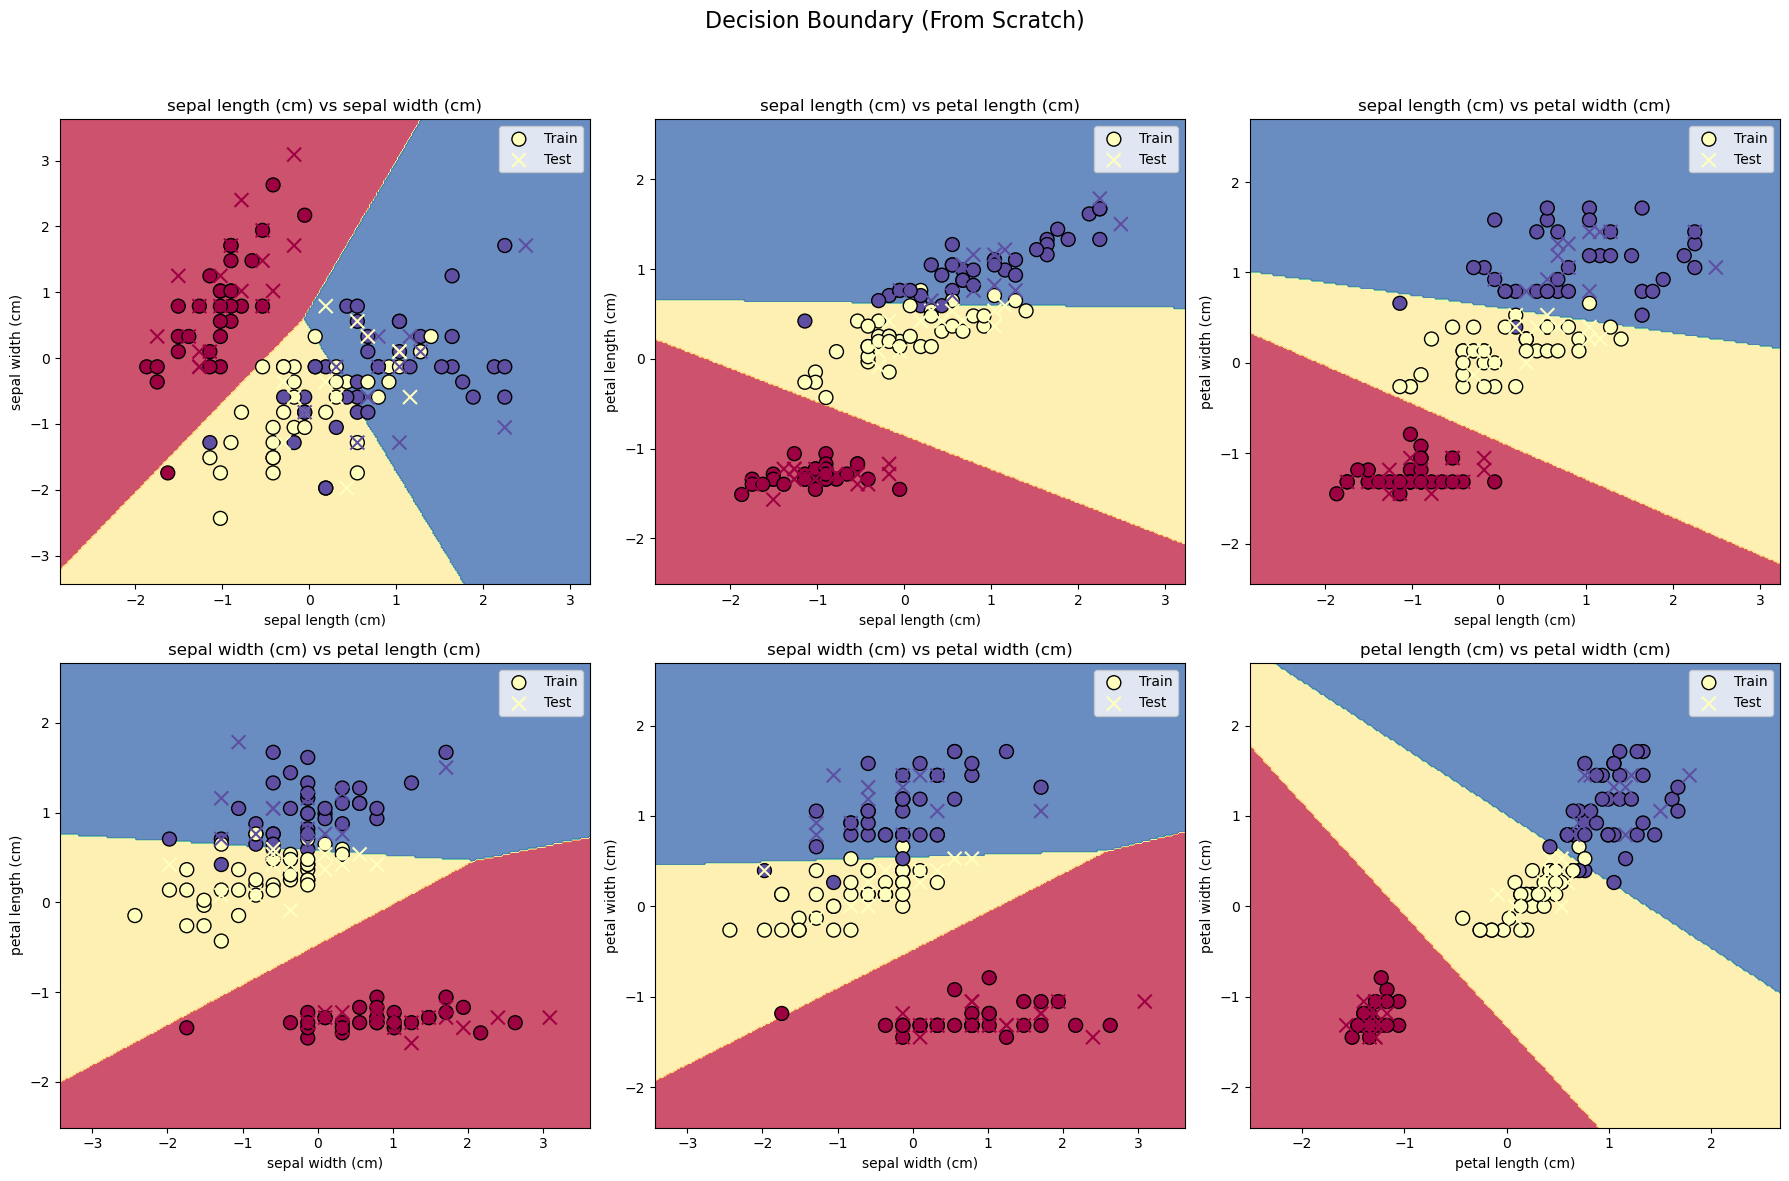

In [14]:
def plot_decision_boundaries(ax, X_train, y_train, X_test, y_test, model_weights, feature_names):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_grid = np.insert(X_grid, 0, 1, axis=1)  
    
    Z = softmax(np.dot(X_grid, model_weights))
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.Spectral, label="Train")

    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, cmap=plt.cm.Spectral, label="Test")
    
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(f'{feature_names[0]} vs {feature_names[1]}')
    ax.legend()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

selected_features = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for i, (f1, f2) in enumerate(selected_features):
    X_train_sub = X_train.iloc[:, [f1, f2]].values
    X_test_sub = X_test.iloc[:, [f1, f2]].values
    feature_names = [iris.feature_names[f1], iris.feature_names[f2]]
    
    weights_sub = train_logistic_regression(X_train_sub, y_train, epochs=10000)
    
    
    ax = axes[i // 3, i % 3]
    plot_decision_boundaries(ax, X_train_sub, np.argmax(y_train, axis=1), X_test_sub, np.argmax(y_test, axis=1), weights_sub, feature_names)

plt.suptitle("Decision Boundary (From Scratch)", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Decision_Boundary_From_Scratch_epoch10000.jpeg',dpi=1000)
plt.show()


C:\Users\Ruopeng\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruopeng\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruopeng\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruopeng\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: Un

Epoch 0, Loss: 1.0483751509127686, Accuracy: 0.6666666666666666, Precision: 0.44598155467720685, Recall: 0.6315789473684211, F1 Score: 0.517163504968383
Epoch 10, Loss: 0.9825415127243229, Accuracy: 0.7111111111111111, Precision: 0.4723320158102767, Recall: 0.6666666666666666, F1 Score: 0.5492063492063491
Epoch 20, Loss: 0.9274348072601191, Accuracy: 0.7111111111111111, Precision: 0.48214285714285715, Recall: 0.6666666666666666, F1 Score: 0.5509009009009009
Epoch 30, Loss: 0.8808490109787523, Accuracy: 0.7111111111111111, Precision: 0.49, Recall: 0.6666666666666666, F1 Score: 0.5528565002249213
Epoch 40, Loss: 0.841048441330544, Accuracy: 0.7111111111111111, Precision: 0.49, Recall: 0.6666666666666666, F1 Score: 0.5528565002249213


C:\Users\Ruopeng\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruopeng\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruopeng\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruopeng\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: Un

Epoch 50, Loss: 0.8066846892330358, Accuracy: 0.7111111111111111, Precision: 0.49, Recall: 0.6666666666666666, F1 Score: 0.5528565002249213
Epoch 60, Loss: 0.7767145976098593, Accuracy: 0.7111111111111111, Precision: 0.49, Recall: 0.6666666666666666, F1 Score: 0.5528565002249213
Epoch 70, Loss: 0.7503300521929616, Accuracy: 0.7111111111111111, Precision: 0.49, Recall: 0.6666666666666666, F1 Score: 0.5528565002249213
Epoch 80, Loss: 0.7269019115642841, Accuracy: 0.7111111111111111, Precision: 0.49, Recall: 0.6666666666666666, F1 Score: 0.5528565002249213
Epoch 90, Loss: 0.7059368283091418, Accuracy: 0.7111111111111111, Precision: 0.49, Recall: 0.6666666666666666, F1 Score: 0.5528565002249213
Epoch 100, Loss: 0.6870446161530507, Accuracy: 0.7333333333333333, Precision: 0.84, Recall: 0.6923076923076922, F1 Score: 0.6090225563909774
Epoch 110, Loss: 0.6699137973925109, Accuracy: 0.7333333333333333, Precision: 0.84, Recall: 0.6923076923076922, F1 Score: 0.6090225563909774
Epoch 120, Loss: 0

Epoch 600, Loss: 0.4108969018757526, Accuracy: 0.8444444444444444, Precision: 0.8833333333333333, Recall: 0.8205128205128206, F1 Score: 0.8064859117490696
Epoch 610, Loss: 0.4090130747683435, Accuracy: 0.8444444444444444, Precision: 0.8833333333333333, Recall: 0.8205128205128206, F1 Score: 0.8064859117490696
Epoch 620, Loss: 0.40716933712290737, Accuracy: 0.8444444444444444, Precision: 0.8833333333333333, Recall: 0.8205128205128206, F1 Score: 0.8064859117490696
Epoch 630, Loss: 0.4053640221397078, Accuracy: 0.8444444444444444, Precision: 0.8833333333333333, Recall: 0.8205128205128206, F1 Score: 0.8064859117490696
Epoch 640, Loss: 0.4035955551130218, Accuracy: 0.8222222222222222, Precision: 0.8295739348370926, Recall: 0.794871794871795, F1 Score: 0.7833333333333333
Epoch 650, Loss: 0.40186244735143745, Accuracy: 0.8222222222222222, Precision: 0.8295739348370926, Recall: 0.794871794871795, F1 Score: 0.7833333333333333
Epoch 660, Loss: 0.40016329056111766, Accuracy: 0.8222222222222222, Pr

Epoch 1150, Loss: 0.3416657863698329, Accuracy: 0.8666666666666667, Precision: 0.8947368421052632, Recall: 0.8461538461538461, F1 Score: 0.8375
Epoch 1160, Loss: 0.3407801447331946, Accuracy: 0.8666666666666667, Precision: 0.8947368421052632, Recall: 0.8461538461538461, F1 Score: 0.8375
Epoch 1170, Loss: 0.33990229449285986, Accuracy: 0.8666666666666667, Precision: 0.8947368421052632, Recall: 0.8461538461538461, F1 Score: 0.8375
Epoch 1180, Loss: 0.3390320813271031, Accuracy: 0.8666666666666667, Precision: 0.8947368421052632, Recall: 0.8461538461538461, F1 Score: 0.8375
Epoch 1190, Loss: 0.3381693558395998, Accuracy: 0.8666666666666667, Precision: 0.8947368421052632, Recall: 0.8461538461538461, F1 Score: 0.8375
Epoch 1200, Loss: 0.3373139733583253, Accuracy: 0.8666666666666667, Precision: 0.8947368421052632, Recall: 0.8461538461538461, F1 Score: 0.8375
Epoch 1210, Loss: 0.33646579374407487, Accuracy: 0.8666666666666667, Precision: 0.8947368421052632, Recall: 0.8461538461538461, F1 Scor

Epoch 1750, Loss: 0.2986788282057444, Accuracy: 0.8888888888888888, Precision: 0.9074074074074074, Recall: 0.8717948717948718, F1 Score: 0.8668714797747056
Epoch 1760, Loss: 0.29809283059580377, Accuracy: 0.8888888888888888, Precision: 0.9074074074074074, Recall: 0.8717948717948718, F1 Score: 0.8668714797747056
Epoch 1770, Loss: 0.29751007747617525, Accuracy: 0.8888888888888888, Precision: 0.9074074074074074, Recall: 0.8717948717948718, F1 Score: 0.8668714797747056
Epoch 1780, Loss: 0.29693053440775574, Accuracy: 0.8888888888888888, Precision: 0.9074074074074074, Recall: 0.8717948717948718, F1 Score: 0.8668714797747056
Epoch 1790, Loss: 0.29635416759042943, Accuracy: 0.8888888888888888, Precision: 0.9074074074074074, Recall: 0.8717948717948718, F1 Score: 0.8668714797747056
Epoch 1800, Loss: 0.2957809438458325, Accuracy: 0.8888888888888888, Precision: 0.9074074074074074, Recall: 0.8717948717948718, F1 Score: 0.8668714797747056
Epoch 1810, Loss: 0.2952108306006967, Accuracy: 0.8888888888

Epoch 2300, Loss: 0.2705346648829257, Accuracy: 0.8888888888888888, Precision: 0.9074074074074074, Recall: 0.8717948717948718, F1 Score: 0.8668714797747056
Epoch 2310, Loss: 0.2700883741733573, Accuracy: 0.8888888888888888, Precision: 0.9074074074074074, Recall: 0.8717948717948718, F1 Score: 0.8668714797747056
Epoch 2320, Loss: 0.26964407094973397, Accuracy: 0.9111111111111111, Precision: 0.9215686274509803, Recall: 0.8974358974358975, F1 Score: 0.8949494949494948
Epoch 2330, Loss: 0.269201740260016, Accuracy: 0.9111111111111111, Precision: 0.9215686274509803, Recall: 0.8974358974358975, F1 Score: 0.8949494949494948
Epoch 2340, Loss: 0.2687613673343125, Accuracy: 0.9111111111111111, Precision: 0.9215686274509803, Recall: 0.8974358974358975, F1 Score: 0.8949494949494948
Epoch 2350, Loss: 0.26832293758150355, Accuracy: 0.9111111111111111, Precision: 0.9215686274509803, Recall: 0.8974358974358975, F1 Score: 0.8949494949494948
Epoch 2360, Loss: 0.26788643658594774, Accuracy: 0.911111111111

Epoch 2850, Loss: 0.2486002202794824, Accuracy: 0.9111111111111111, Precision: 0.9215686274509803, Recall: 0.8974358974358975, F1 Score: 0.8949494949494948
Epoch 2860, Loss: 0.2482448987459791, Accuracy: 0.9111111111111111, Precision: 0.9215686274509803, Recall: 0.8974358974358975, F1 Score: 0.8949494949494948
Epoch 2870, Loss: 0.24789094616013269, Accuracy: 0.9111111111111111, Precision: 0.9215686274509803, Recall: 0.8974358974358975, F1 Score: 0.8949494949494948
Epoch 2880, Loss: 0.24753835414891773, Accuracy: 0.9111111111111111, Precision: 0.9215686274509803, Recall: 0.8974358974358975, F1 Score: 0.8949494949494948
Epoch 2890, Loss: 0.2471871144155146, Accuracy: 0.9111111111111111, Precision: 0.9215686274509803, Recall: 0.8974358974358975, F1 Score: 0.8949494949494948
Epoch 2900, Loss: 0.24683721873829767, Accuracy: 0.9111111111111111, Precision: 0.9215686274509803, Recall: 0.8974358974358975, F1 Score: 0.8949494949494948
Epoch 2910, Loss: 0.24648865896984118, Accuracy: 0.9111111111

Epoch 3410, Loss: 0.23060293744853602, Accuracy: 0.9333333333333333, Precision: 0.9375, Recall: 0.923076923076923, F1 Score: 0.9220389805097451
Epoch 3420, Loss: 0.23031318276157192, Accuracy: 0.9333333333333333, Precision: 0.9375, Recall: 0.923076923076923, F1 Score: 0.9220389805097451
Epoch 3430, Loss: 0.23002442294650818, Accuracy: 0.9333333333333333, Precision: 0.9375, Recall: 0.923076923076923, F1 Score: 0.9220389805097451
Epoch 3440, Loss: 0.22973665273262395, Accuracy: 0.9333333333333333, Precision: 0.9375, Recall: 0.923076923076923, F1 Score: 0.9220389805097451
Epoch 3450, Loss: 0.22944986688867655, Accuracy: 0.9333333333333333, Precision: 0.9375, Recall: 0.923076923076923, F1 Score: 0.9220389805097451
Epoch 3460, Loss: 0.22916406022249428, Accuracy: 0.9333333333333333, Precision: 0.9375, Recall: 0.923076923076923, F1 Score: 0.9220389805097451
Epoch 3470, Loss: 0.22887922758057477, Accuracy: 0.9333333333333333, Precision: 0.9375, Recall: 0.923076923076923, F1 Score: 0.922038980

Epoch 3980, Loss: 0.21553458628892577, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 3990, Loss: 0.21529414210730333, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4000, Loss: 0.21505444534367749, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4010, Loss: 0.2148154924611724, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4020, Loss: 0.21457727994594386, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4030, Loss: 0.21433980430698102, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4040, Loss: 0.2141030620759103, Accuracy: 0.955555555

Epoch 4530, Loss: 0.20333450525640076, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4540, Loss: 0.2031304602568855, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4550, Loss: 0.20292699780373252, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4560, Loss: 0.20272411538120816, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4570, Loss: 0.2025218104883193, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4580, Loss: 0.20232008063870177, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 4590, Loss: 0.20211892336050943, Accuracy: 0.955555555

Epoch 5080, Loss: 0.19291577834785822, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 5090, Loss: 0.19274038950397734, Accuracy: 0.9555555555555556, Precision: 0.9555555555555556, Recall: 0.9487179487179488, F1 Score: 0.9484126984126983
Epoch 5100, Loss: 0.19256546412289222, Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1 Score: 0.974320987654321
Epoch 5110, Loss: 0.1923910003578647, Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1 Score: 0.974320987654321
Epoch 5120, Loss: 0.1922169963720576, Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1 Score: 0.974320987654321
Epoch 5130, Loss: 0.19204345033846668, Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1 Score: 0.974320987654321
Epoch 5140, Loss: 0.19187036043985323, Accuracy: 0.9777777777777

Epoch 5640, Loss: 0.18375993895415058, Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1 Score: 0.974320987654321
Epoch 5650, Loss: 0.18360791160631756, Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1 Score: 0.974320987654321
Epoch 5660, Loss: 0.18345625786178407, Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1 Score: 0.974320987654321
Epoch 5670, Loss: 0.18330497633783172, Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1 Score: 0.974320987654321
Epoch 5680, Loss: 0.18315406565859035, Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1 Score: 0.974320987654321
Epoch 5690, Loss: 0.18300352445499538, Accuracy: 0.9777777777777777, Precision: 0.9761904761904763, Recall: 0.9743589743589745, F1 Score: 0.974320987654321
Epoch 5700, Loss: 0.18285335136474518, Accuracy: 0.9777777777777

Epoch 6340, Loss: 0.17395038560996995, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 6350, Loss: 0.17382151033864457, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 6360, Loss: 0.17369292633666653, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 6370, Loss: 0.1735646326125718, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 6380, Loss: 0.1734366281793943, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 6390, Loss: 0.17330891205464008, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 6400, Loss: 0.1731814832602619, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 6410, Loss: 0.17305434082263388, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 6420, Loss: 0.17292748377252645, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 6430, Loss: 0.1728009111450812, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 6440, Loss: 0.17267462197978

Epoch 7200, Loss: 0.1638389690058552, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 7210, Loss: 0.163731930460815, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 7220, Loss: 0.16362511206411812, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 7230, Loss: 0.16351851313281254, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 7240, Loss: 0.1634121329867626, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 7250, Loss: 0.16330597094863436, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 7260, Loss: 0.163200026343881, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 7270, Loss: 0.16309429850072857, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 7280, Loss: 0.1629887867501617, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 7290, Loss: 0.16288349042590944, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 7300, Loss: 0.16277840886443123

Epoch 8050, Loss: 0.15546442903541716, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8060, Loss: 0.15537391638856013, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8070, Loss: 0.15528357462100795, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8080, Loss: 0.1551934032450573, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8090, Loss: 0.155103401774853, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8100, Loss: 0.15501356972637959, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8110, Loss: 0.15492390661745253, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8120, Loss: 0.15483441196770947, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8130, Loss: 0.15474508529860176, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8140, Loss: 0.15465592613338597, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8150, Loss: 0.1545669339971

Epoch 8900, Loss: 0.14833619868714545, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8910, Loss: 0.14825863603884334, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8920, Loss: 0.14818120864108433, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8930, Loss: 0.1481039161363834, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8940, Loss: 0.14802675816851027, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8950, Loss: 0.1479497343824839, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8960, Loss: 0.14787284442456697, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8970, Loss: 0.14779608794226032, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8980, Loss: 0.14771946458429785, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 8990, Loss: 0.14764297400064094, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9000, Loss: 0.147566615842

Epoch 9790, Loss: 0.14192501805625463, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9800, Loss: 0.14185822298864406, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9810, Loss: 0.14179153570943237, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9820, Loss: 0.14172495595420553, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9830, Loss: 0.1416584834594115, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9840, Loss: 0.14159211796235643, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9850, Loss: 0.14152585920120148, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9860, Loss: 0.1414597069149591, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9870, Loss: 0.14139366084348978, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9880, Loss: 0.14132772072749855, Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Epoch 9890, Loss: 0.141261886308

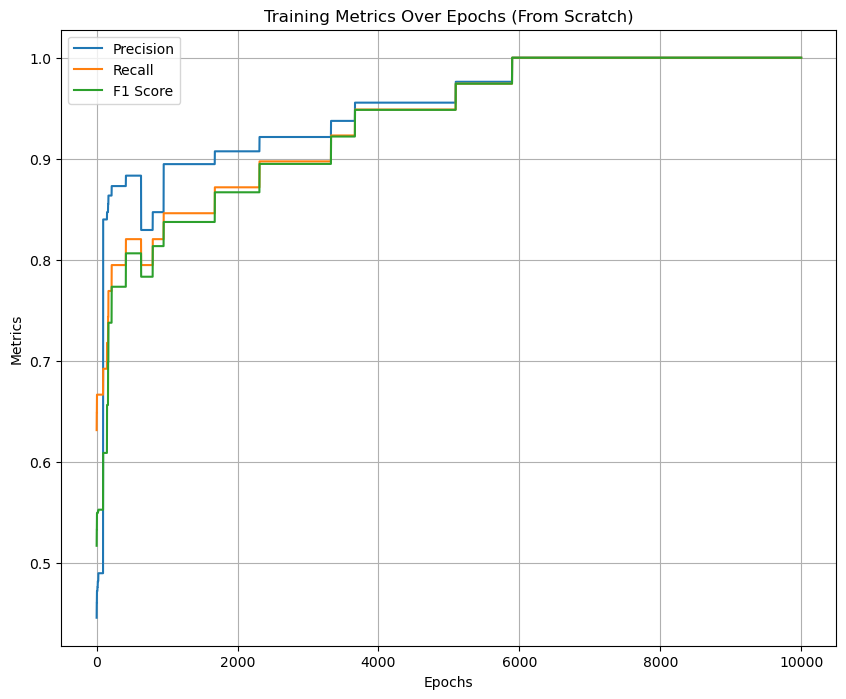

In [7]:
def logistic_regression(X, y, learning_rate=0.01, epochs=100):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.random.rand(X.shape[1], y.shape[1])
    train_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for epoch in range(epochs):
        scores = np.dot(X, weights)
        predictions = softmax(scores)
        loss = cross_entropy_loss(predictions, y)
        gradients = compute_gradients(X, y, predictions)
        weights = update_weights(weights, gradients, learning_rate)
        
        # Evaluate the model
        y_pred_train = predict(X_train, weights)
        y_pred_test = predict(X_test, weights)
 
        # Convert one-hot to labels for accuracy calculation
        y_train_labels = np.argmax(y_train, axis=1)
        y_test_labels = np.argmax(y_test, axis=1)
        
        # Calculate metrics
        accuracy = np.mean(y_pred_test == y_test_labels)
        precision = precision_score(y_test_labels, y_pred_test, average='macro')
        recall = recall_score(y_test_labels, y_pred_test, average='macro')
        f1 = f1_score(y_test_labels, y_pred_test, average='macro')
        
        # Record metrics
        train_accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

    return weights, train_accuracies, precisions, recalls, f1_scores

# Train the model
weights, accuracies, precisions, recalls, f1s = logistic_regression(X_train, y_train, epochs=10000)

# Plot the metrics
plt.figure(figsize=(10, 8))
plt.plot(precisions, label='Precision')
plt.plot(recalls, label='Recall')
plt.plot(f1s, label='F1 Score')
plt.title('Training Metrics Over Epochs (From Scratch)')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.savefig('Training_Metrics_Over_Epochs_From_Scratch.jpeg',dpi=1000)
plt.show()